# Desafio do Módulo 3

### Objetivos
*  O objetivo principal deste trabalho é apresentar uma implementação em Python para a análise de sentimento e mineração de textos, envolvendo textos de tweets coletados via API e o pacote tweepy.
A coleta de tweets e a análise de polaridade (sentimento) utilizando o Python foi apresentada na aula 4.4.
Opcionalmente, os tweets podem ser coletados utilizando a linguagem R (aula 4.3) ou a plataforma Knime (aula 4.5), e depois submetidos à análise de polaridade via Python (pacote TextBlob).

### Enunciado
O desafio consiste na uma implementação em Python para a análise de sentimento e mineração de textos, envolvendo textos de tweets coletados via API e o pacote tweepy.
Primeiramente, é necessário cadastrar uma conta no twitter e solicitar acesso de desenvolvedor. Depois, você deve criar sua aplicação no twitter e gerar as credenciais de acesso.

Os tweets coletados devem utilizar as seguintes palavras chave:
* ('home office' OR 'trabalho remoto' OR 'trabalho em casa' OR #homeoffice OR #trabalhoremoto OR #trabalhoemcasa)  Não é necessário informar a # na string.

Além disso, selecione os tipos de tweets “mixed” e inclua o valor total de tweets para o
máximo possível. Para isso, defina o parâmetro count da função search do tweepy para
27000.

### Atividades
Para isto, serão executadas as atividades:

<b>1º.</b> Coleta de um conjunto de tweets através de API do Twitter utilizando o Python e
seu pacote tweepy. Opcionalmente, os tweets podem ser coletados utilizando a
linguagem R (aula 4.3) ou a plataforma Knime (4.5). Deve-se definir o parâmetro
para quantidade de tweets coletados para 28000.

<b>2º.</b> Categorização dos tweets coletados, de forma que eles sejam identificados com
sua respectiva polaridade, sendo uma tweet que represente sentimento positivo
(polaridade > 0), negativo (polaridade < 0) ou neutro (polaridade = 0).

<b>3º.</b> Tokenização de palavras e definição da sua frequência conforme o sentimento que
o tweet expressa, a partir dos termos coletados no texto dos tweets com
sentimento positivo e negativo.


In [105]:
# Libs to catch and treat data:
import tweepy           
import numpy as np
import random
from textblob import TextBlob as tb
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import collections
import os
plt.style.use('seaborn')
%matplotlib inline

# getting access keys saved at credentials.py:
from credentials import *

In [2]:
# API Setup
def twitter_setup():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    return api

In [41]:
# Starting API
api = twitter_setup()

# Setting keywords
keywords = ('home office OR trabalho remoto OR trabalho em casa OR homeoffice OR trabalhoremoto OR trabalhoemcasa')

In [42]:
# Searching for tweets with defined keywords
tweets = api.search(q=keywords, count=28000, result_type='mixed')

In [45]:
# Polarity variable
analysis = None

# List to store scores
tweets_score = []

for tweet in tweets:
    print(f'--> {tweet.text}')
    analysis = tb(tweet.text)
    polarity = analysis.sentiment.polarity
    tweets_score.append(polarity)

--> Essa semana o meu trabalho me colocou em home office e se eu já me achava uma péssima comercial na agência, em casa… https://t.co/LdkCbmY9Op
--> @Super_Cid Paz e tranquilidade @Super_Cid 😎 Trabalhar em casa, é sensacional! #HomeofficeVida E para continuar assi… https://t.co/yFwKWfpH9w
--> Mano kkkk
Eu me queimei em casa estou trabalhando de home office então foi um acidente de trabalho, quero meus direitos kkk
--> Pq claro q é super necessário ter uma obra no meu quintal em meio a uma pandemia enquanto eu trabalho de home offic… https://t.co/OKizw8xorj
--> procurando forças pra conseguir cuidar do neném, voltar ao trabalho em home office, ser responsável pela organizaçã… https://t.co/2TNDqwgbTJ
--> Home office faz parte do futuro do trabalho. Essa modalidade vem conquistando cada vez mais adeptos, tanto entre as… https://t.co/FnmQN3U6zO
--> A transmissão, que terá início às 16h, no canal da EJud no YouTube, debaterá as temáticas: “A sustentabilidade em c… https://t.co/aXooQIkqHt
--

In [79]:
tweets_sentiment = ['Positivo' if x > 0 else 'Negativo'  if x < 0 else 'Neutro'for x in tweets_score]
df = pd.DataFrame(np.transpose([[tweet.text for tweet in tweets], tweets_score, tweets_sentiment]), columns=['Tweets', 'Score', 'Polarity'])

df['Size'] = np.array([len(tweet.text) for tweet in tweets])
df['Id'] = np.array([tweet.id for tweet in tweets])
df['Created at'] = np.array([tweet.created_at for tweet in tweets])
df['Source'] = np.array([tweet.source for tweet in tweets])
df['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
df['Retweets'] = np.array([tweet.retweet_count for tweet in tweets])
    
df.style.hide_index()

Tweets,Score,Polarity,Size,Id,Created at,Source,Likes,Retweets
"Essa semana o meu trabalho me colocou em home office e se eu já me achava uma péssima comercial na agência, em casa… https://t.co/LdkCbmY9Op",0.0,Neutro,140,1275783044448862211,2020-06-24 13:29:15,Twitter for iPhone,1,0
"@Super_Cid Paz e tranquilidade @Super_Cid 😎 Trabalhar em casa, é sensacional! #HomeofficeVida E para continuar assi… https://t.co/yFwKWfpH9w",0.0,Neutro,140,1275782424237137921,2020-06-24 13:26:47,Twitter Web App,0,0
"Mano kkkk Eu me queimei em casa estou trabalhando de home office então foi um acidente de trabalho, quero meus direitos kkk",0.0,Neutro,123,1275778365233008640,2020-06-24 13:10:39,Twitter for Android,0,0
Pq claro q é super necessário ter uma obra no meu quintal em meio a uma pandemia enquanto eu trabalho de home offic… https://t.co/OKizw8xorj,0.3333333333333333,Positivo,140,1275775263696191489,2020-06-24 12:58:20,Twitter for Android,0,0
"procurando forças pra conseguir cuidar do neném, voltar ao trabalho em home office, ser responsável pela organizaçã… https://t.co/2TNDqwgbTJ",0.0,Neutro,140,1275765577051750401,2020-06-24 12:19:50,Twitter for iPhone,2,0
"Home office faz parte do futuro do trabalho. Essa modalidade vem conquistando cada vez mais adeptos, tanto entre as… https://t.co/FnmQN3U6zO",0.0,Neutro,140,1275761646749835266,2020-06-24 12:04:13,Twitter Web App,0,0
"A transmissão, que terá início às 16h, no canal da EJud no YouTube, debaterá as temáticas: “A sustentabilidade em c… https://t.co/aXooQIkqHt",0.0,Neutro,140,1275757429884518400,2020-06-24 11:47:28,Twitter for iPhone,1,0
"💬 Com o isolamento social e o deslocamento do trabalho de muitas pessoas para Home Office, veio junto a Dor na Colu… https://t.co/VsPJc8bpK1",0.03333333333333333,Positivo,140,1275755892567310336,2020-06-24 11:41:21,Instagram,0,0
"@HMartins eu acho q o segredo nesses dias é fazer o urgente, e deixar o q é só importante pro dia seguinte. a gente… https://t.co/m5HDsGBXPL",0.0,Neutro,140,1275636605160689666,2020-06-24 03:47:21,Twitter Web App,0,0
digamos que eventualmente a gente pare de se chocar com a fato da galera ter desistido de ficar em casa e todos os… https://t.co/fODrqLepp8,0.0,Neutro,139,1275604963360636928,2020-06-24 01:41:37,Twitter Web App,0,0


In [80]:
# Now let's analyze some statistics and basic information like mean size of tweets, 
#tweets with more likes and tweets with more retweets.
mean_size = np.mean(df['Size'])

most_liked = np.max(df['Likes'])
most_retweeted = np.max(df['Retweets'])

most_liked_index = df[df.Likes == most_liked].index[0]
most_retweeted_index = df[df.Retweets == most_retweeted].index[0]


print(f'Tweet with more Likes:\n{df["Tweets"][most_liked_index]}')
print(f'Qtd. Likes: {most_liked}')
print(f'Qtd. Characters: {df["Size"][most_liked_index]}\n')

print(f'Tweet with more Retweets:\n{df["Tweets"][most_retweeted_index]}')
print(f'Qtd. Likes: {most_retweeted}')
print(f'Qtd. Characters: {df["Size"][most_retweeted_index]}')

Tweet with more Likes:
Minha mãe (grupo de risco) tá de home office sem nenhuma diferença no trabalho.

Todo santo dia ouço cliente ligand… https://t.co/cXtVxavbws
Qtd. Likes: 37
Qtd. Characters: 140

Tweet with more Retweets:
RT @sortimentos: Psicopedagoga dá dicas de como retomar os estudos em casa durante a pandemia

https://t.co/6cJhXdIlSZ

#Psicopedagoga #est…
Qtd. Likes: 3
Qtd. Characters: 140


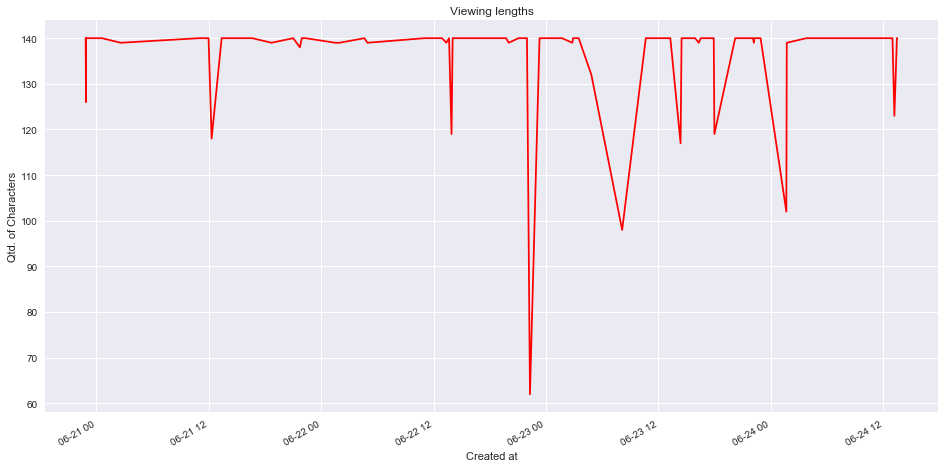

In [83]:
# Let's take a look at the time series in relation to the size of tweets, likes and retweets.
ts_size = pd.Series(data=df['Size'].values, index=df['Created at'])
ts_likes = pd.Series(data=df['Likes'].values, index=df['Created at'])
ts_retweets = pd.Series(data=df['Retweets'].values, index=df['Created at'])

fig = plt.figure(figsize=(16, 8))
ts_size.plot(color='r')
plt.xlabel('Created at')
plt.ylabel('Qtd. of Characters')
plt.title('Viewing lengths')
fig.savefig('img\char_view.png')
plt.show()

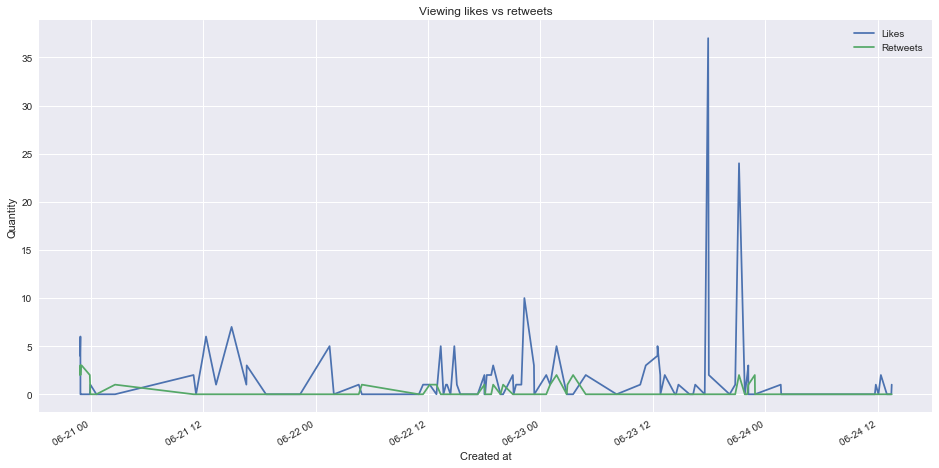

In [84]:
fig = plt.figure(figsize=(16, 8))
ts_likes.plot(label="Likes", legend=True)
ts_retweets.plot(label="Retweets", legend=True);
plt.xlabel('Created at')
plt.ylabel('Quantity')
plt.title('Viewing likes vs retweets')
fig.savefig('img\likes_re_view.png')
plt.show()

In [85]:
#Now let's take a look at the types of sources of tweets.

#  Get possible sources:
sources = []
for source in df['Source']:
    if source not in sources:
        sources.append(source)

# Print sources:
print("Content creation sources:")
for source in sources:
    print(f'* {source}')

Content creation sources:
* Twitter for iPhone
* Twitter Web App
* Twitter for Android
* Instagram
* mLabs - Gestão de Redes Sociais
* EmpregoBrasil
* TweetDeck
* QuarentenaBot
* Etus Brasil
* Twitter for iPad


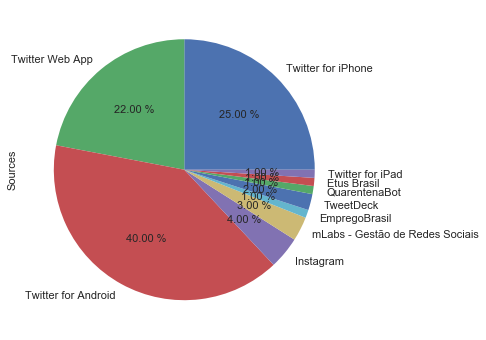

In [128]:
percent = np.zeros(len(sources))

for source in df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
fig = plt.figure()
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f %%', figsize=(6, 6));
fig.savefig('img\sources_view.png')

In [99]:
# Let's vectorize and check the frequency of each word in the set of tweets we are analyzing.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(df.Tweets)
word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,co,84
1,https,83
2,em,74
3,de,71
4,home,66
5,trabalho,59
6,office,59
7,casa,58
8,eu,47
9,que,39


In [102]:
# Let's add a few words to the set of Stopwords.
datasetPath = 'D:\DataScience\Bootcamp-Analista-de-Dados-IGTI\Modulo-03\Desafio-03'
with open(datasetPath+'\\stopwords.txt', 'r', encoding='utf-8') as filename:
    lines = filename.readlines()
    stopwords = np.loadtxt(lines, dtype=str)

wordcount = collections.defaultdict(int)
for word in stopwords:
    word_count = word_count[word_count.word != word]

word_count[:60]

,word,count
4,home,66
5,trabalho,59
6,office,59
7,casa,58
23,gente,12
25,todo,11
31,trabalhar,9
33,pandemia,9
35,mundo,8
38,fazer,7


<Figure size 1280x640 with 0 Axes>

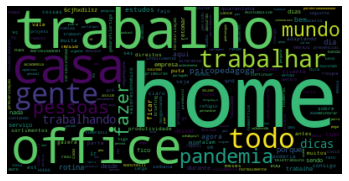

In [103]:
# Creating a Word Cloud
wordcount = collections.defaultdict(int)
wordcount = word_count.set_index('word')['count'].to_dict()
wc = WordCloud().generate_from_frequencies(wordcount)
plt.figure(figsize=(16, 8), dpi=80)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [106]:
text = ''
for word in word_count['word']:
    text += word + ' '
    
    
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
globe_mask = np.array(Image.open("img/globe_mask.png"))
globe_mask = globe_mask[:,:,0]

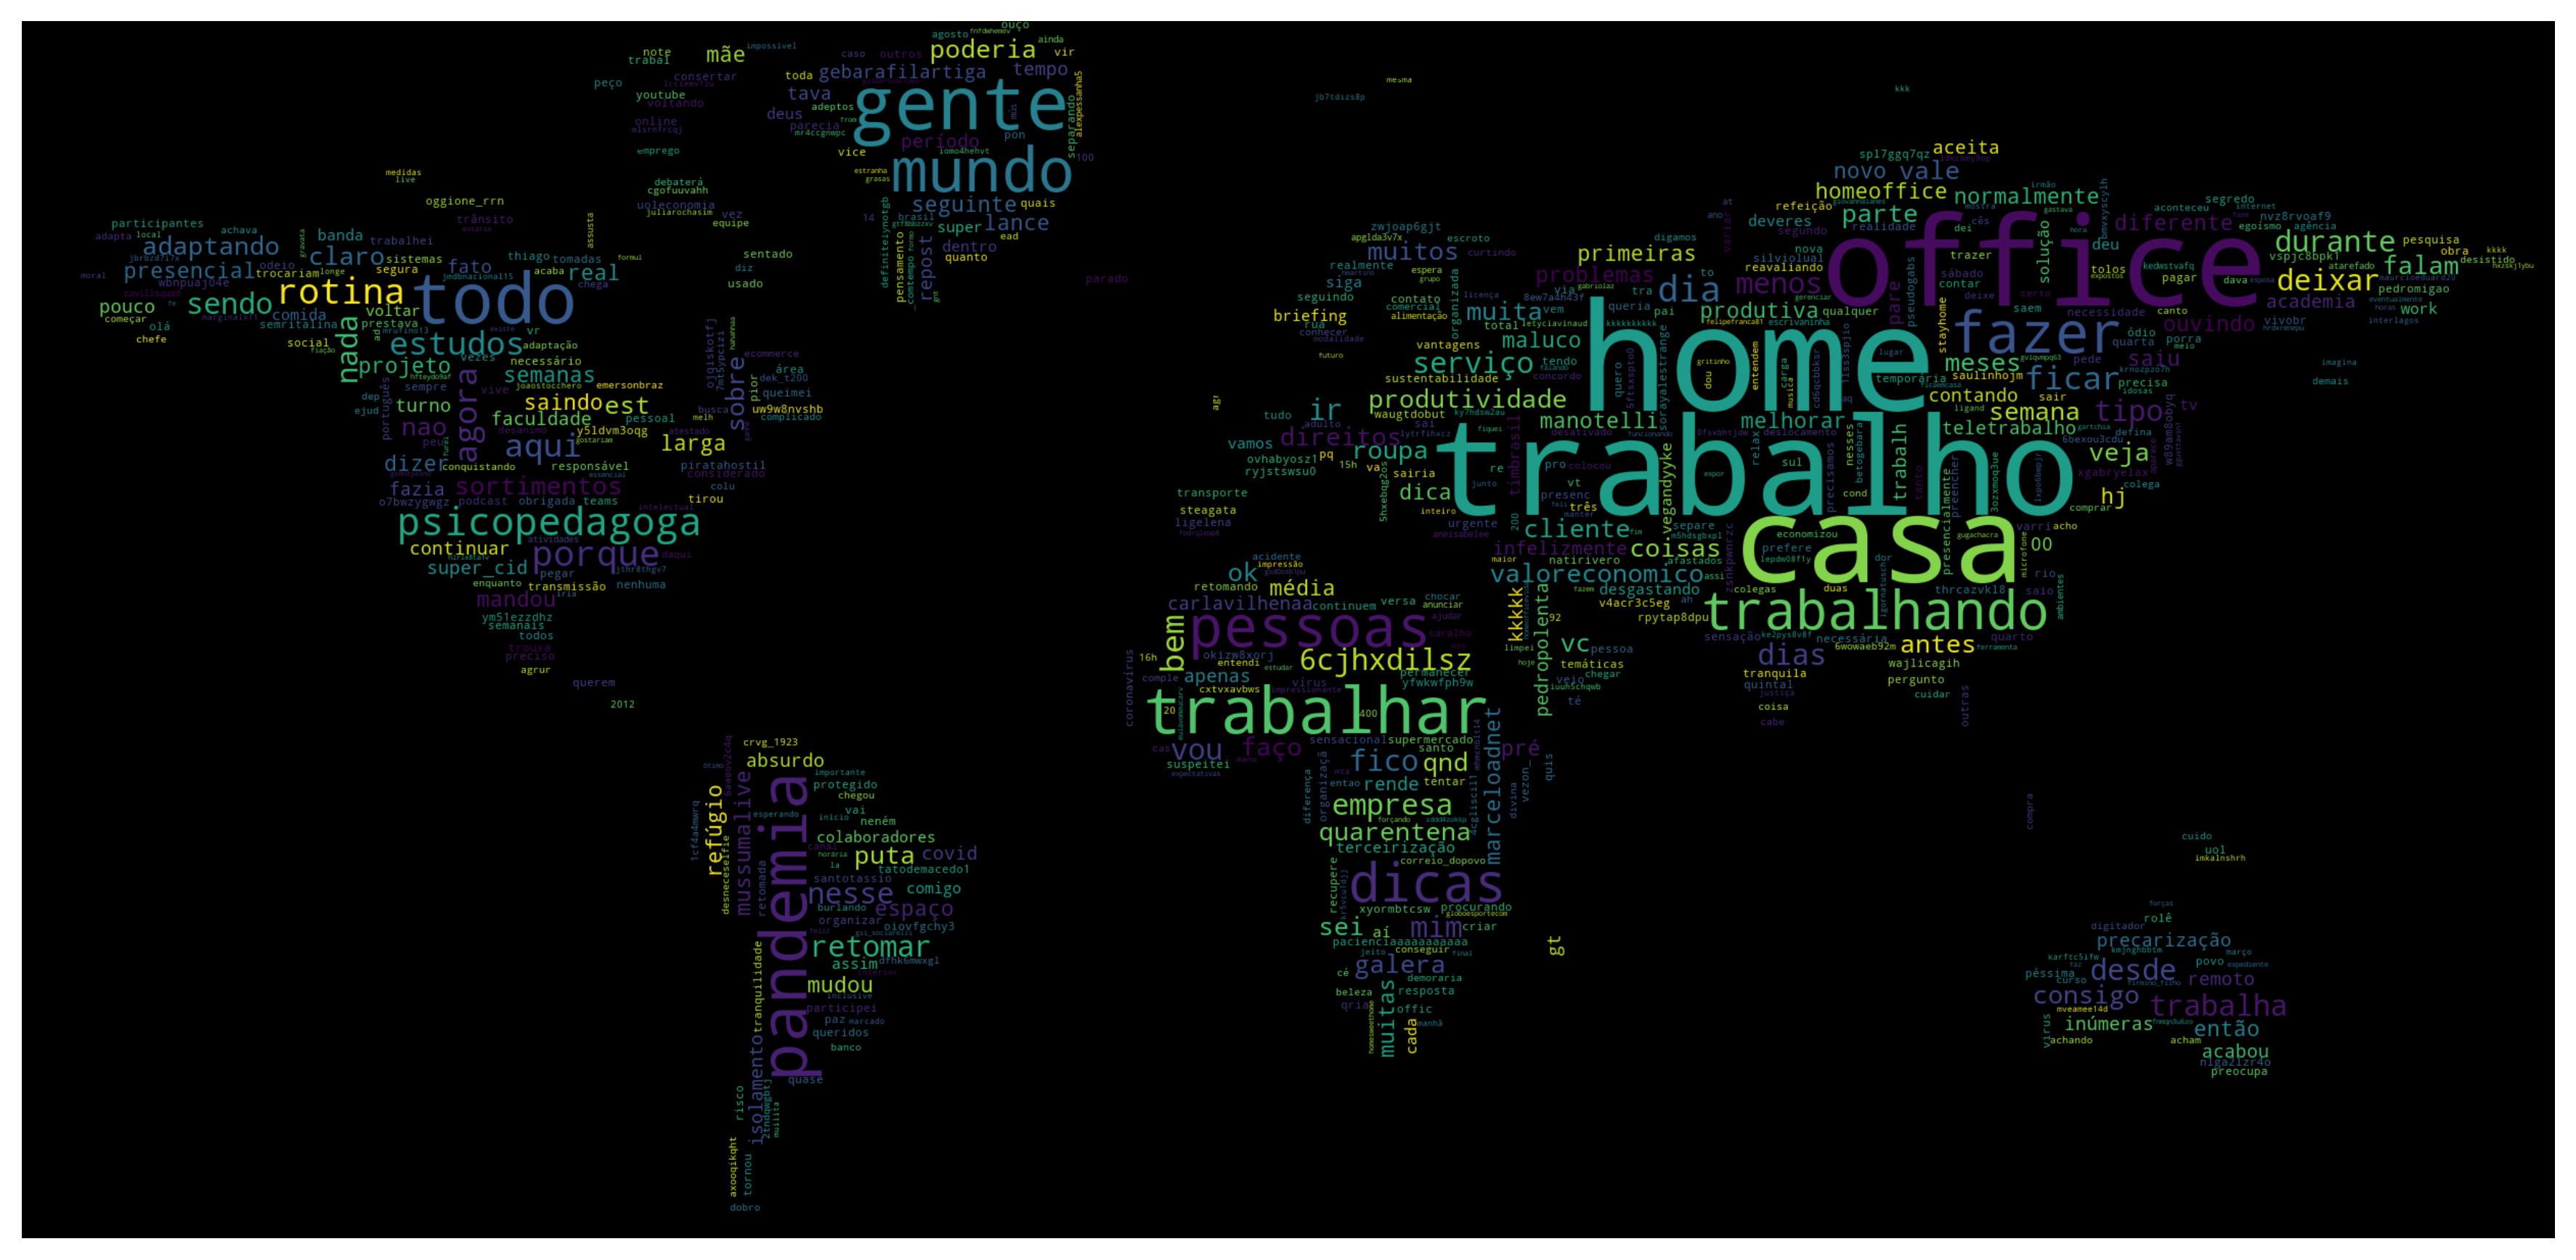

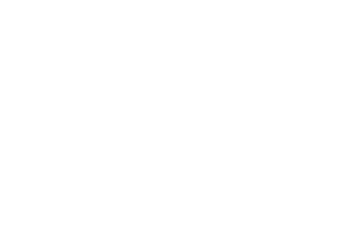

In [120]:
wc = WordCloud(background_color="black", max_words=2000, mask=globe_mask,
               stopwords=stopwords, contour_width=3, contour_color='black')

# generate word cloud
wc.generate_from_frequencies(wordcount)
# store to file
wc.to_file("img/brainstorm.png")

# show
plt.figure(figsize=(15, 8), dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
#plt.imshow(brazil_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [112]:
tweets_positive = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Polarity'][index] == 'Positivo']
tweets_neutral   = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Polarity'][index] == 'Neutro']
tweets_negative = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Polarity'][index] == 'Negativo']

print(f'Positive tweets: {len(tweets_positive)*100/len(df["Tweets"]):.2f}%')
print(f'Neutral tweets: {len(tweets_neutral)*100/len(df["Tweets"]):.2f}%')
print(f'Negative tweets: {len(tweets_negative)*100/len(df["Tweets"]):.2f}%')

Positive tweets: 8.00%
Neutral tweets: 92.00%
Negative tweets: 0.00%


In [74]:
print(f'MÉDIA DE SENTIMENTO: {str(np.mean(tweets_score))}')

MÉDIA DE SENTIMENTO: 0.023196969696969695


--- 
# Questões do Desafio

### Pergunta 1: A função <font color="red">mean</font> do pacote numpy foi utilizada no desafio para apoiar a análise de sentimento realizada. Considere o código abaixo escrito em Python. Qual o valor que a função <font color="red">mean</font>  do pacote numpy irá retornar?

<img src="img/des-mod3-dad01.PNG">

In [32]:
valores = [8, 3, 4, 8, 3, 4, 3, 2, 0, 8]
print(f'O valor retornado pela função mean do numpy é: {np.mean(valores)}')

O valor retornado pela função mean do numpy é: 4.3


### Pergunta 2: Em Python, a função <font color="red">sentiment.polarity</font> do pacote TextBlob foi usada para calcular a polaridade do tweets. A função retorna um valor entre -1 e 1 sobre um determinado texto. Sobre a polaridade calculada por esta função, podemos afirmar que:

R: Quando uma polaridade for maior que 0(zero), indica que o texto tem uma tendência indicar um sentimento positivo.

### Pergunta 3: Qual das bibliotecas abaixo pode ser usada no Python para acessar a API do Twitter?

R: tweepy.

### Pergunta 4: Considere a função <font color="red">search</font> do pacote tweepy para coletar tweets que atendam a condição de possui uma determinada palavra chave conforme exemplo abaixo. Qual das assertivas abaixo representam um valor inválido que parâmetro result_type da função pode assumir?

 search(q=keyword, result_type=?)

R: trend.

### Pergunta 5: Considere a função <font color="red">search</font> do pacote tweepy para coletar tweets que atendam a condição de possui uma determinada palavra chave conforme exemplo abaixo. Qual das assertivas abaixo está CORRETA?

R: O parâmetro tweet_mode='extended' indica que deve ser recuperado o texto total (280 caracteres) do tweet e não o texto truncado (140 caracteres).

### Pergunta 6: Sobre a API do Twitter para coletar de dados, qual das assertivas abaixo está INCORRETA?

R: Não é necessário ter uma conta no Twitter, basta cadastrar um e-mail no Twitter e solicitar uma conta de desenvolvedor.

### Pergunta 7: Considere o trecho de código abaixo no Python referente à análise de sentimento dos tweets. Tal exemplo foi apresentado na videoaula. Marque a alternativa INCORRETA.

<img src="img/des-mod3-dad02.PNG">

R: A linha 4 realiza a análise de polaridade do texto do tweet e passa o valor encontrado para a variável analysis.

### Pergunta 8: Considere o trecho de código abaixo e marque a alternativa CORRETA.

<img src="img/des-mod3-dad21.PNG">

R: Nas linhas 18 e 19 a função max do numpy identifica respectivamente o valor máximo das colunas Likes e Retweets do dataframe.

### Pergunta 9: Considere o trecho de código abaixo e marque a alternativa CORRETA:

<img src="img/des-mod3-dad22.PNG">

R: Este trecho de código pode ser usado para identificar a fonte (origem) do tweet e gerar um gráfico apontando a quantidades de tweets por fonte.

### Pergunta 10: Considere o trecho de código abaixo e marque a alternativa CORRETA:

<img src="img/des-mod3-dad05.PNG">

R: Este trecho de código pode ser usado para identificar o sentimento expresso pelo tweet.

### Pergunta 11: Considere o trecho de código abaixo e marque a alternativa que indica o gráfico gerado pelo código:

<img src="img/des-mod3-dad06.PNG">

### Observação: os valores do gráfico podem ser diferentes, pois cada coletor de tweet pode coletar dados diferentes. O objetivo é identificar qual tipo de gráfico gerado.

R:
<img src="img/des-mod3-dad07.PNG">

### Pergunta 12: Considere o trecho de código abaixo e marque a alternativa que indica o gráfico gerado pelo código:

<img src="img/des-mod3-dad11.PNG">

R:
<img src="img/des-mod3-dad12.PNG">

### Pergunta 13: Considere o trecho de código abaixo e marque a alternativa que melhor representa o que é gerado pelo código:

<img src="img/des-mod3-dad16.PNG">

R:
<img src="img/des-mod3-dad17.PNG">

### Pergunta 14: Para realizar o desafio utilizamos, entre outras, as seguintes bibliotecas do Python: tweepy, wordcloud, textblob, geopy.

### Considere as funcionalidades utilizadas de cada uma destas bibliotecas e marque a assertiva CORRETA.

R: Tweepy – Utilizada para fazer a interface com a API do Twitter e assim, coletar os tweets.